<a href="https://colab.research.google.com/github/housker/neural-network-challenge-1/blob/main/student_loans_with_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Loan Risk with Deep Learning

In [2]:
# https://github.com/scikit-learn/scikit-learn/issues/27363
# !pip show scikit-learn
# !pip show keras
# !pip show tensorflow
# !pip show sklearn
# !pip show scikeras
# !pip show keract
# !pip show eli5 # This package requires a downgraded version of scikit-learn which is incompatible with all the other packages
# !pip show keract   # requires an older (1.x) version of tensorflow with tf.compat.v1.disable_eager_execution() that is incompatible

!pip install scikeras # scikeras tries to downgrade tensorflow
!pip install --upgrade tensorflow

In [5]:
# Imports
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from pathlib import Path

#Feature importance
from scikeras.wrappers import KerasClassifier   # removed from newer versions of tensorflow, i.e., from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.inspection import permutation_importance

---

## Prepare the data to be used on a neural network model

### Step 1: Read the `student-loans.csv` file into a Pandas DataFrame. Review the DataFrame, looking for columns that could eventually define your features and target variables.   

In [26]:
# Read the csv into a Pandas DataFrame
file_path = "https://static.bc-edx.com/ai/ail-v-1-0/m18/lms/datasets/student-loans.csv"
loans_df = pd.read_csv(file_path)

# Review the DataFrame
loans_df.head()

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score,credit_ranking
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [27]:
# Review the data types associated with the columns
loans_df.dtypes

payment_history           float64
location_parameter        float64
stem_degree_score         float64
gpa_ranking               float64
alumni_success            float64
study_major_code          float64
time_to_completion        float64
finance_workshop_score    float64
cohort_ranking            float64
total_loan_score          float64
financial_aid_score       float64
credit_ranking              int64
dtype: object

In [28]:
# Check the credit_ranking value counts
loans_df["credit_ranking"].value_counts()

credit_ranking
1    855
0    744
Name: count, dtype: int64

### Step 2: Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “credit_ranking”. The remaining columns should define the features dataset.

In [9]:
# Define the target set y using the credit_ranking column
y = loans_df["credit_ranking"]

# Display a sample of y
y.head()

0    0
1    0
2    0
3    1
4    0
Name: credit_ranking, dtype: int64

In [10]:
# Define features set X by selecting all columns but credit_ranking
X = loans_df.drop(columns=["credit_ranking"])

# Review the features DataFrame
X.head()

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


### Step 3: Split the features and target sets into training and testing datasets.


In [11]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Step 4: Use scikit-learn's `StandardScaler` to scale the features data.

In [12]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
scaler.fit(X_train)

# Scale the features train and test dataset
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


---

## Compile and Evaluate a Model Using a Neural Network

### Step 1: Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.


In [15]:
# Define the the number of inputs (features) to the model
# Starting with all features
input_nodes = len(X_train.columns)

# Review the number of features
input_nodes

11

In [16]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes1 = 10

# Review the number hidden nodes in the first layer
display(hidden_nodes1)

# Define the number of hidden nodes for the second hidden layer
hidden_nodes2 = 5

# Review the number hidden nodes in the second layer
display(hidden_nodes2)

# Define the number of neurons in the output layer
output_nodes = 1

# Review the number of output neurons
display(output_nodes)

10

5

1

In [17]:
# Create the Sequential model instance
nn_model = tf.keras.models.Sequential()

# Add the first hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes1, activation="relu", input_dim=input_nodes))

# Add the second hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes2, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_model.add(tf.keras.layers.Dense(units=output_nodes, activation="sigmoid"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# Display the Sequential model summary
nn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 181 (724.00 B)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

### Step 2: Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.


In [19]:
# Compile the Sequential model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [20]:
# Fit the model using 50 epochs and the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4679 - loss: 0.7922
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5400 - loss: 0.7091
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6321 - loss: 0.6594
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6887 - loss: 0.6372
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7279 - loss: 0.6156
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7279 - loss: 0.5962
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7629 - loss: 0.5734
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7478 - loss: 0.5675
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7598 - loss: 0.5503
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7545 - loss: 0.5251
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7437 - loss: 0.5227
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7599 - lo

### Step 3: Evaluate the model using the test data to determine the model’s loss and accuracy.


In [23]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
loss, accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {loss}, Accuracy: {accuracy}")

13/13 - 0s - 3ms/step - accuracy: 0.7450 - loss: 0.5255
Loss: 0.5254997611045837, Accuracy: 0.7450000047683716


<Axes: >

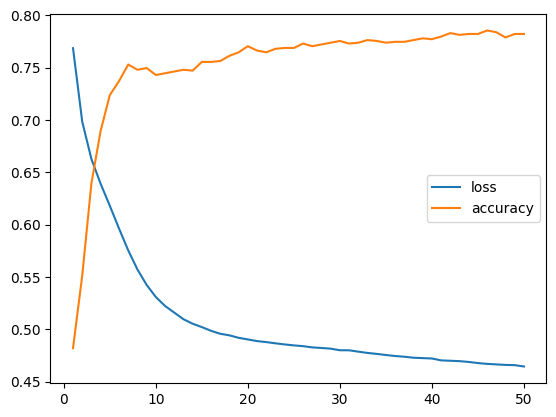

In [24]:
# Plot
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot loss and accuracy
history_df.plot(y=["loss", "accuracy"])

### Step 4: Save and export your model to a keras file, and name the file `student_loans.keras`.


In [25]:
# Set the model's file path
path = Path("student_loans.keras")

# Export your model to a keras file
nn_model.save(path)

---
## Predict Loan Repayment Success by Using your Neural Network Model

### Step 1: Reload your saved model.

In [39]:
# Dependencies needed for feature importance
!pip uninstall scikit-learn # after uninstall, need to restart session, losing variables, therefore needs to be done before loading trained model from file
!pip install scikit-learn==1.2.2 # in order to have 'if_delegate_has_method' from 'sklearn.utils.metaestimators'
!pip install eli5

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scikit_learn-1.2.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/sklearn/*
Proceed (Y/n)? y
  Successfully uninstalled scikit-learn-1.2.2
  Using cached scikit_learn-1.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.6 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikeras 0.13.0 requires scikit-learn>=1.4.2, but you have scikit-learn 1.2.2 which is incompatible.


ERROR: Operation cancelled by user


TypeError: C function sklearn.utils.murmurhash.murmurhash3_bytes_s32 has wrong signature (expected __pyx_t_5numpy_int32_t (PyObject *, unsigned int, int __pyx_skip_dispatch), got __pyx_t_7sklearn_5utils_9_typedefs_int32_t (PyObject *, unsigned int, int __pyx_skip_dispatch))

In [3]:
from eli5.sklearn import PermutationImportance
import eli5
from pathlib import Path

In [13]:
# Set the model's file path
path = Path("student_loans.keras")

# Load the model to a new object
nn_model_loaded = tf.keras.models.load_model(path)
# Wrapping with KerasClassifier gives you the ability to find feature importance
nn_classifier = KerasClassifier(model=nn_model_loaded, epochs=50, batch_size=10, verbose=0)
fit_classifier = nn_classifier.fit(X_train_scaled, y_train)

### Step 2: Make predictions on the testing data and save the predictions to a DataFrame.

In [14]:
# Make predictions with the test data
predictions = nn_model_loaded.predict(X_test_scaled,verbose=2)

# Display a sample of the predictions
predictions[0:5]

13/13 - 0s - 7ms/step


array([[0.16789219],
       [0.50293875],
       [0.6754481 ],
       [0.75528383],
       [0.97436506]], dtype=float32)

In [15]:
# Save the predictions to a DataFrame and round the predictions to binary results
predictions_df = pd.DataFrame(predictions.round(), columns=["predictions"])

# Display a sample of the DataFrame
predictions_df.head()

,predictions
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0


In [16]:
predictions_df.value_counts()

predictions
1.0            203
0.0            197
Name: count, dtype: int64

### Step 4: Display a classification report with the y test data and predictions

In [17]:
# Print the classification report with the y test data and predictions
print(classification_report(y_test, predictions_df))

              precision    recall  f1-score   support

           0       0.73      0.76      0.74       188
           1       0.78      0.75      0.76       212

    accuracy                           0.75       400
   macro avg       0.75      0.75      0.75       400
weighted avg       0.75      0.75      0.75       400



# Feature importance
Feature importance ideas courtesy of:

https://stackoverflow.com/questions/45361559/feature-importance-chart-in-neural-network-using-keras-in-python/52410345#52410345

In [18]:
weights = nn_model_loaded.layers[0].get_weights()[0]
# Columns are epochs, rows are features
w_df = pd.DataFrame(weights)
w_df_flipped = w_df.transpose().reset_index(drop=True)
w_df_flipped.columns = X_train_scaled.columns
# Each row corresponds to an epoch. The last row shows the weights that the model used at the end training, i.e., the final set of weights that constitutes the trained model.
w_df_flipped

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score
0,-0.225031,-0.180868,0.013691,-0.111153,-0.535072,-0.243647,-0.671308,0.244766,-0.084615,0.452573,0.200431
1,-0.642817,-1.114777,0.221473,-0.289119,0.618010,0.037957,0.368567,-0.035483,-0.587458,0.361084,-0.262267
2,0.293880,0.043325,0.511741,0.077600,0.315650,0.311549,0.841678,-0.107821,-0.023389,0.554669,-0.927435
3,0.324966,0.227602,-0.320254,0.337559,0.240792,-0.077757,0.346138,0.277409,-0.243001,-0.949165,0.138575
4,-0.199617,-0.021857,0.119081,-0.036945,-0.305639,-0.016101,-0.639727,0.199848,0.223146,-0.769019,0.018578
5,0.055171,-0.024638,0.051606,-0.042037,-0.471710,-0.292230,-0.106390,0.014118,-0.922410,-0.334210,-0.742587
6,0.340233,-0.235179,-0.048289,-0.172155,-0.495067,0.516504,-0.627051,-0.074081,-0.144930,-0.064889,0.614226
7,-0.096741,0.692109,-0.168894,-0.253400,0.727586,0.497016,0.351845,-0.406465,-0.369443,0.169818,-0.997350
8,0.016578,-0.032750,-0.206560,0.607618,0.254594,-0.374297,0.017433,0.065262,-0.545146,-0.103898,-0.311891
9,0.314331,-0.037211,0.335219,0.132272,-0.032617,0.189144,0.135180,-0.254496,0.463824,-0.776226,-0.527785


In [19]:
results = permutation_importance(nn_classifier, X_test_scaled, y_test, n_repeats=10, random_state=1)
for name, importance in zip(X.columns, results.importances_mean):
    print(f"{name} {'.'*(25-len(name))} {round(importance, 5)}")

payment_history .......... 0.0175
location_parameter ....... 0.033
stem_degree_score ........ 0.01525
gpa_ranking .............. 0.0025
alumni_success ........... 0.00775
study_major_code ......... 0.01925
time_to_completion ....... 0.03825
finance_workshop_score ... 0.0055
cohort_ranking ........... 0.0155
total_loan_score ......... 0.047
financial_aid_score ...... 0.10925


When I ran permutation_importance the first time, I got:
```
payment_history .......... 0.01275
location_parameter ....... 0.04875
stem_degree_score ........ 0.0075
gpa_ranking .............. 0.0115
alumni_success ........... 0.006
study_major_code ......... 0.0475
time_to_completion ....... 0.08875
finance_workshop_score ... 0.0
cohort_ranking ........... 0.01975
total_loan_score ......... 0.01925
financial_aid_score ...... 0.0945
```
Second time:
```
payment_history .......... 0.0045
location_parameter ....... 0.0415
stem_degree_score ........ -0.00575
gpa_ranking .............. -0.00325
alumni_success ........... 0.0055
study_major_code ......... 0.0355
time_to_completion ....... 0.08375
finance_workshop_score ... 0.0
cohort_ranking ........... 0.00375
total_loan_score ......... 0.01675
financial_aid_score ...... 0.08275
```
Third
```
payment_history .......... -0.0055
location_parameter ....... 0.052
stem_degree_score ........ 0.00575
gpa_ranking .............. 0.00475
alumni_success ........... 0.00425
study_major_code ......... 0.04
time_to_completion ....... 0.10425
finance_workshop_score ... 0.0005
cohort_ranking ........... 0.0085
total_loan_score ......... 0.01375
financial_aid_score ...... 0.087
```

In [ ]:
# !pip install keract   # requires an older (1.x) version of tensorflow with tf.compat.v1.disable_eager_execution()
# from keract import get_gradients_of_activations
# print(tf.executing_eagerly())

# gradients = get_gradients_of_activations(nn_classifier, X_test, y_test)
# importance_scores = gradients.sum(axis=1)
# importance_scores

True

In [21]:
!pip show eli5 eli5==0.13.0

Name: eli5
Version: 0.13.0
Summary: Debug machine learning classifiers and explain their predictions
Home-page: https://github.com/eli5-org/eli5
Author: Mikhail Korobov, Konstantin Lopuhin
Author-email: kmike84@gmail.com, kostia.lopuhin@gmail.com
License: MIT license
Location: /usr/local/lib/python3.10/dist-packages
Requires: attrs, graphviz, jinja2, numpy, scikit-learn, scipy, six, tabulate
Required-by: 


In [24]:
perm = PermutationImportance(nn_classifier, random_state=1).fit(X_test_scaled, y_test)
# .fit(X_train_scaled, y_train)

eli5.show_weights(perm, feature_names=X.columns.tolist())

# !pip install --upgrade scikit-learn
# !pip show scikit-learn

Weight,Feature
0.1125 ± 0.0429,financial_aid_score
0.0480 ± 0.0301,time_to_completion
0.0460 ± 0.0291,total_loan_score
0.0430 ± 0.0242,location_parameter
0.0185 ± 0.0183,stem_degree_score
0.0180 ± 0.0156,payment_history
0.0165 ± 0.0133,study_major_code
0.0110 ± 0.0236,cohort_ranking
0.0075 ± 0.0170,alumni_success
0.0020 ± 0.0080,finance_workshop_score


# Optimized model
Let's try to reduce noise and improve accuracy by using fewer features and implementing back-propagation.

In [31]:
loans_df.head()

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score,credit_ranking
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [49]:
X_revised = loans_df.drop(columns=["credit_ranking", "stem_degree_score", "finance_workshop_score", "payment_history", "gpa_ranking", "cohort_ranking", "alumni_success"])

In [50]:
len(X_revised.columns)

5

In [51]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_revised, y, random_state=1)
scaler_r = StandardScaler()
scaler_r.fit(Xr_train)
Xr_train_scaled = scaler_r.transform(Xr_train)
Xr_test_scaled = scaler_r.transform(Xr_test)

In [52]:
nn_model_r = tf.keras.models.Sequential([
    Dense(units=4, activation="leaky_relu", input_dim=len(Xr_train.columns)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(units=3, activation="relu"),
    BatchNormalization(),
    Dropout(0.5),
    Dense(units=1, activation="sigmoid")
])

nn_model_r.compile(loss="binary_crossentropy", optimizer="adamw", metrics=["accuracy"])

nn_model_r.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 4)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 4)                   │              16 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 3)                   │              15 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 3)                   │              12 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 3)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71 (284.00 B)

 Trainable params: 57 (228.00 B)

 Non-trainable params: 14 (56.00 B)

In [53]:
fit_model_r = nn_model_r.fit(Xr_train_scaled, yr_train, batch_size=32, epochs=100)
loss, accuracy = nn_model_r.evaluate(Xr_test_scaled, yr_test, verbose=0)
print(f"Loss: {loss}, Accuracy: {accuracy}")

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4749 - loss: 0.9644
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4919 - loss: 0.9507
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5160 - loss: 0.8993
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5387 - loss: 0.8369
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5211 - loss: 0.8498
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5251 - loss: 0.8355
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5167 - loss: 0.7849
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5470 - loss: 0.7602
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5379 - loss: 0.7549
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5370 - loss: 0.7534
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5663 - loss: 0.7387
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy:

<Axes: >

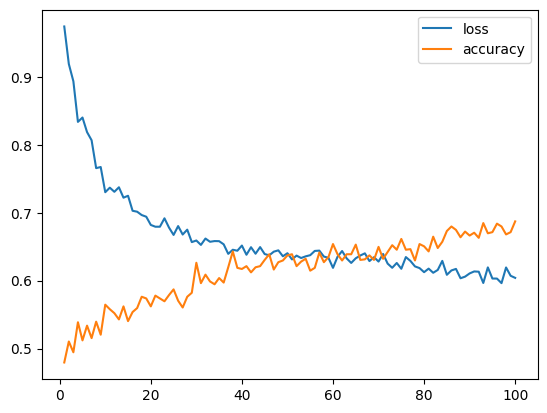

In [54]:
history_r_df = pd.DataFrame(fit_model_r.history)
history_r_df.index += 1
history_r_df.plot(y=["loss", "accuracy"])

In [40]:
predictions_r = nn_model_r.predict(Xr_test_scaled,verbose=2)
predictions_r_df = pd.DataFrame(predictions_r.round(), columns=["predictions"])
print(classification_report(y_test, predictions_r_df))

13/13 - 0s - 17ms/step
              precision    recall  f1-score   support

           0       0.78      0.64      0.70       188
           1       0.73      0.83      0.78       212

    accuracy                           0.74       400
   macro avg       0.75      0.74      0.74       400
weighted avg       0.75      0.74      0.74       400



Compared to the original
```
precision    recall  f1-score   support

           0       0.72      0.77      0.74       188
           1       0.78      0.73      0.76       212

    accuracy                           0.75       400
   macro avg       0.75      0.75      0.75       400
weighted avg       0.75      0.75      0.75       400
```


---
## Discuss creating a recommendation system for student loans

Briefly answer the following questions in the space provided:

1. Describe the data that you would need to collect to build a recommendation system to recommend student loan options for students. Explain why this data would be relevant and appropriate.

2. Based on the data you chose to use in this recommendation system, would your model be using collaborative filtering, content-based filtering, or context-based filtering? Justify why the data you selected would be suitable for your choice of filtering method.

3. Describe two real-world challenges that you would take into consideration while building a recommendation system for student loans. Explain why these challenges would be of concern for a student loan recommendation system.

**1. Describe the data that you would need to collect to build a recommendation system to recommend student loan options for students. Explain why this data would be relevant and appropriate.**


Because we were able to improve the accuracy of the model by decreasing the number of features, we would not need to collect all of the data in the provided dataset. Doing so makes the model unnecessarily complex and increases noise. The important features to include are:

* time_to_completion
* financial_aid_score
* location_parameter
* study_major_code
* total_loan_score

It make sense that these factors capture useful information about a student's ability to pay back his/her loans. Time to completion directly impacts how soon a student can begin earning an income in the workplace, and in the case of unsibsidized loans, what compound interest will accumulate. Students tend to have a shorter credit history than older adults, and therefore a lower credit ranking. The financial aid and total loan score may therefore better reflect their ability to pay back a loan, and in the case of financial aid, indicate the size of the loan and presumably whether or not that loan is porportional to a student's current finances (as opposed to predicted). There are certain determinants that can predict future earning potential, and major might a more granular choice than STEM degree. There is covariance betwen major and STEM degree; you'd just need one of the two features. While many STEM degrees can afford lucrative careers, they are no guarantee (math majors could go on to be penniless postdocs just as easily as Wall Street quants), and they are not the only ones (plenty of finance majors on Wall Street). Those intent on getting a more marketable major may be more focused on healthy finances to begin with. Lastly, some locations are more economically depressed, some more economically vibrant. Some have a higher cost of living, some lend more oportunities for new grads. It is therefore reasonable to suppose location could impact a student's ability to pay back their loan as well.

<br>

---
<br>

**2. Based on the data you chose to use in this recommendation system, would your model be using collaborative filtering, content-based filtering, or context-based filtering? Justify why the data you selected would be suitable for your choice of filtering method.**


The features: `time_to_completion`, `financial_aid_score`, `location_parameter`, `study_major_code`, and `total_loan_score` can be used to develop a profile of the borrower used for content-based filtering. We may also be able to use the similarity between these profiles for collaborative filtering. We are not collecting information for a context-based filter, and given that the timeframe for repaying a loan is long-lived compared to that of the situational factors of a context-based filter, we may not want to.   

<br>

---
<br>

**3. Describe two real-world challenges that you would take into consideration while building a recommendation system for student loans. Explain why these challenges would be of concern for a student loan recommendation system.**


Collecting and storing this data needs to adhere to legal regulations, for example, those protecting students' privacy. Because this data is sensitive, personally identifiable information, it also needs to be handled with high security standards. If the data includes credit card or social security numbers, a data breach could lead to identity theft or fraud. As little of this type of data should be collected and retained as possible. Of the data that is collected, it is important that it be correct, complete, and up-to-date. Poor data quality can diminish the reliability of the system by decreasing the accuracy of both the underlying model used to predict the target as well as the collaborative filtering itself. Incomplete data shrinks the sample size of training and test data, which results in the model becoming less representative of the broader population. If there are patterns in the types of data points which are incomplete, that can even lead to bias. Bias in general should be avoided not only by ensuring good data quality, but also by double-checking that none of the factors used in the system correlate strongly with ethnicity, sex, age, disability, or any other protected class. This is a concern for the legal, ethical, and reputation damages that would result from a biased system, for example by recommending loan products that are unsuitable or unaffordable for their target audience. The system also needs to be kept current with revisions in regulatory and policy requirements, loan terms, and interest rates, as well as changes in economic conditions, especially those with widespread effects on students' ability to repay their loans. The usability of the system is also important. A new system can be challenging to integrate into existing ones, and to do so in a way that scales well. Designing a performant system that takes into account customers' behavior can provide better user experience.  
